We will be analyzing restaurant data from the different restaurants we specified in Progress Report #1.

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.stats import mannwhitneyu
nltk.download('all')

/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading pac

True

In [2]:
data = pd.read_csv('data/atoboy.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,Atoboy,5,An incredible dining experience- the staff was...,2024-04-22 00:07:58.721677
1,Atoboy,5,Amazing. The Squash and Octopus along with Gra...,2024-04-20 00:07:58.723865
2,Atoboy,5,NaN,2024-04-18 00:07:58.725778
3,Atoboy,3,Food was a 4/5. So good but not really impress...,2024-04-18 00:07:58.727502
4,Atoboy,5,Such a great place! Highly recommend it,2024-04-18 00:07:58.729207
...,...,...,...,...
1089,Atoboy,3,Hits and misses.Some dishes lacked any real fl...,2017-04-25 00:10:10.551536
1090,Atoboy,4,Atoboy is a minimalists favorite restaurant wi...,2017-04-25 00:10:11.032865
1091,Atoboy,5,NaN,2017-04-25 00:10:11.036738
1092,Atoboy,5,NaN,2017-04-25 00:10:11.040680


Extracting Year from 'published_at_date' column

In [3]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_93146/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,Atoboy,5,An incredible dining experience- the staff was...,2024
1,Atoboy,5,Amazing. The Squash and Octopus along with Gra...,2024
2,Atoboy,5,NaN,2024
3,Atoboy,3,Food was a 4/5. So good but not really impress...,2024
4,Atoboy,5,Such a great place! Highly recommend it,2024
...,...,...,...,...
1089,Atoboy,3,Hits and misses.Some dishes lacked any real fl...,2017
1090,Atoboy,4,Atoboy is a minimalists favorite restaurant wi...,2017
1091,Atoboy,5,NaN,2017
1092,Atoboy,5,NaN,2017


Charts for ratings

<AxesSubplot:xlabel='rating'>

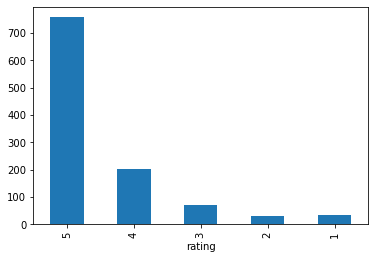

In [4]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

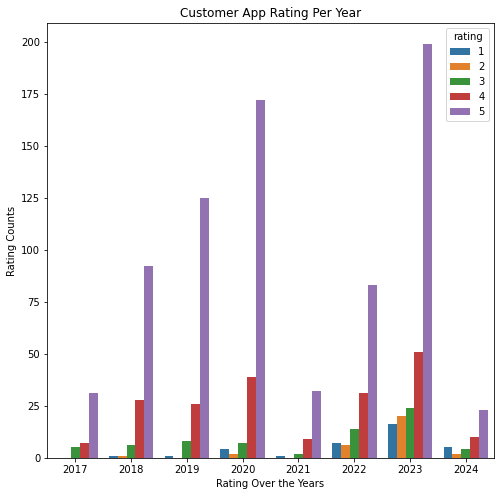

In [5]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [6]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_93146/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,An incredible dining experience- the staff was...
1,Amazing. The Squash and Octopus along with Gra...
2,<NA>
3,Food was a 4/5. So good but not really impress...
4,Such a great place! Highly recommend it
...,...
1089,Hits and misses.Some dishes lacked any real fl...
1090,Atoboy is a minimalists favorite restaurant wi...
1091,<NA>
1092,<NA>


In [8]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [10]:
test_sentence = "Service was excellent, food was delicious, and vibe was great ! We got the korean style boneless fried chicken (sweet chili sauce was fire), veg buckwheat pancake, and spicy chicken. Our server was so kind and attentive & we had a great experience; the sweet treat cookie at end was so cute :)"

preprocess(test_sentence)

'servic excel food delici vibe great korean style boneless fri chicken sweet chili sauc fire veg buckwheat pancak spici chicken server kind attent great experi sweet treat cooki end cute'

In [9]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_93146/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,Atoboy,5,An incredible dining experience- the staff was...,2024,incred dine experi staff super attent
1,Atoboy,5,Amazing. The Squash and Octopus along with Gra...,2024,amaz squash octopu granita hand
2,Atoboy,5,<NA>,2024,
3,Atoboy,3,Food was a 4/5. So good but not really impress...,2024,food good impress atmospher loud portion small...
4,Atoboy,5,Such a great place! Highly recommend it,2024,great place highli recommend


In [10]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('food', 373),
 ('dish', 269),
 ('menu', 217),
 ('servic', 192),
 ('korean', 186),
 ('good', 175),
 ('great', 169),
 ('chicken', 145),
 ('restaur', 133),
 ('fri', 133),
 ('amaz', 120),
 ('delici', 116),
 ('experi', 109),
 ('tast', 102),
 ('flavor', 97),
 ('place', 93),
 ('recommend', 93),
 ('price', 91),
 ('meal', 90),
 ('order', 84),
 ('atoboy', 76),
 ('dessert', 72),
 ('time', 71),
 ('staff', 63),
 ('small', 62),
 ('back', 62),
 ('excel', 61),
 ('nice', 59),
 ('pork', 58),
 ('enjoy', 56),
 ('love', 56),
 ('wine', 55),
 ('octopu', 54),
 ('fix', 53),
 ('rice', 53),
 ('eat', 52),
 ('dine', 50),
 ('plate', 50),
 ('bit', 47),
 ('expect', 45),
 ('worth', 45),
 ('favorit', 43),
 ('portion', 42),
 ('includ', 42),
 ('perfect', 41),
 ('uniqu', 41),
 ('make', 40),
 ('friendli', 39),
 ('thing', 38),
 ('friend', 38)]

In [11]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_93146/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,Atoboy,5,An incredible dining experience- the staff was...,2024,incred dine experi staff super attent,1
1,Atoboy,5,Amazing. The Squash and Octopus along with Gra...,2024,amaz squash octopu granita hand,1
2,Atoboy,5,<NA>,2024,,1
3,Atoboy,3,Food was a 4/5. So good but not really impress...,2024,food good impress atmospher loud portion small...,0
4,Atoboy,5,Such a great place! Highly recommend it,2024,great place highli recommend,1
...,...,...,...,...,...,...
1089,Atoboy,3,Hits and misses.Some dishes lacked any real fl...,2017,hit miss dish lack real flavor outstand hope a...,0
1090,Atoboy,4,Atoboy is a minimalists favorite restaurant wi...,2017,atoboy minimalist favorit restaur friendli sta...,1
1091,Atoboy,5,<NA>,2017,,1
1092,Atoboy,5,<NA>,2017,,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

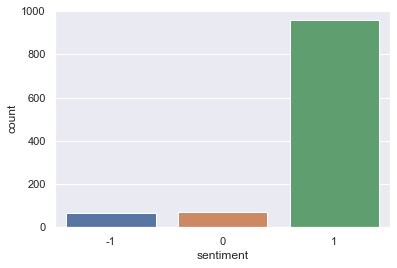

In [12]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [14]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_93146/3818571148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0       0.5994
1       0.4939
2       0.0000
3       0.7003
4       0.7650
         ...  
1089    0.0000
1090    0.8720
1091    0.0000
1092    0.0000
1093    0.8126
Name: review_sentiment, Length: 1094, dtype: float64

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.864963503649635

<AxesSubplot:xlabel='published_at_date', ylabel='review_sentiment'>

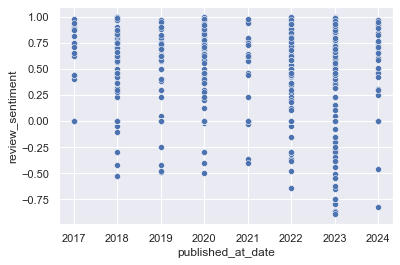

In [18]:
sns.scatterplot(data=df, x='published_at_date', y='review_sentiment')

<AxesSubplot:xlabel='published_at_date', ylabel='review_sentiment'>

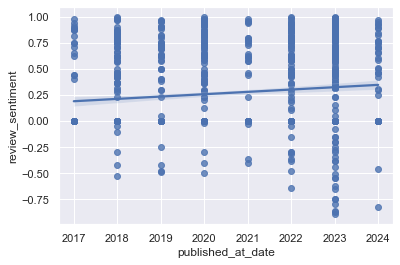

In [19]:
sns.regplot(x="published_at_date", y="review_sentiment", data=df)

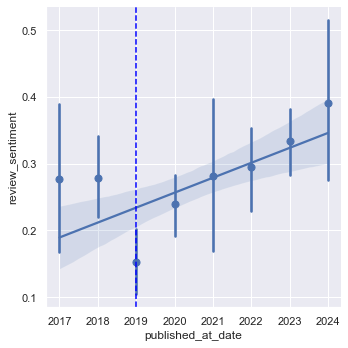

In [20]:
sns.lmplot(x="published_at_date", y="review_sentiment", data=df, x_estimator=np.mean)
plt.axvline(x=2019, color='blue', linestyle='--', label='Year 2019')

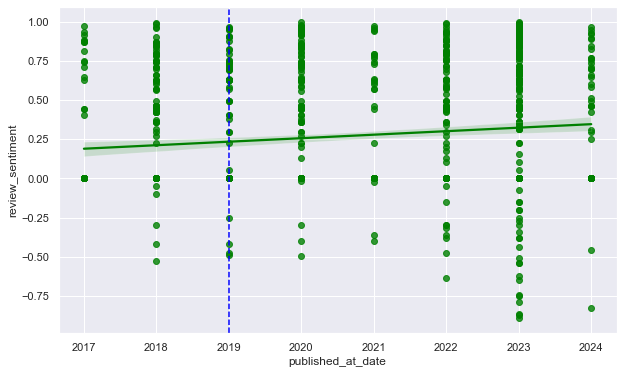

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='green')
plt.axvline(x=2019, color='blue', linestyle='--', label='Year 2019')

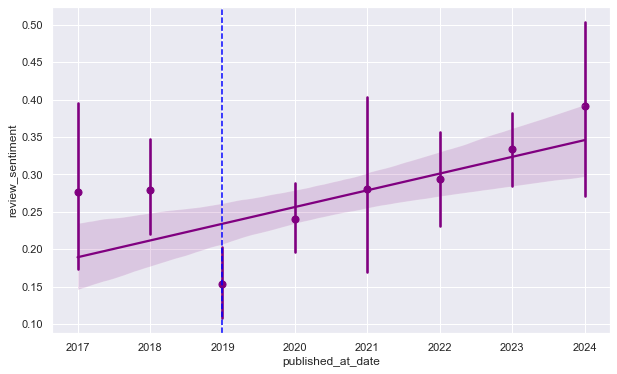

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='purple', x_estimator=np.mean)
plt.axvline(x=2019, color='blue', linestyle='--', label='Year 2019')

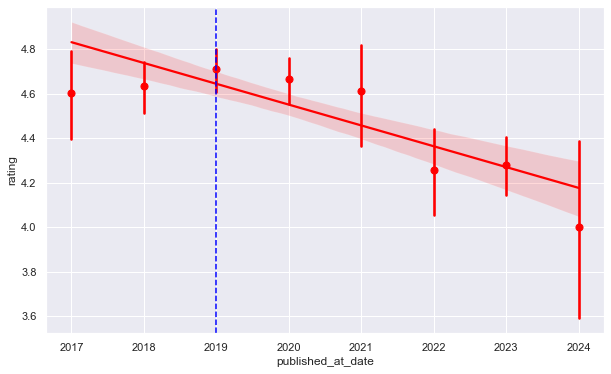

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='rating', marker='o', color='red', x_estimator=np.mean)
plt.axvline(x=2019, color='blue', linestyle='--', label='Year 2019')

In [24]:
# Wilcoxon rank-sum / Mann-whitney U Test
year = 2019

before_data = df[df['published_at_date'] < year]
after_data = df[df['published_at_date'] >= year]

u_stat, p_value_mw = mannwhitneyu(before_data['review_sentiment'], after_data['review_sentiment'])
print("Mann-Whitney U test - U-statistic:", u_stat, "p-value:", p_value_mw)

Mann-Whitney U test - U-statistic: 78927.0 p-value: 0.9977328650296591


In [27]:
# make altered data into csv file
df.to_csv('altdata/' + 'atoboy.csv', index=False)